In [7]:
import matplotlib.pyplot as plt
import numpy as np

#Initialize  t, y and arrays

In [39]:
import math

dt = .01
iterations = 10000
class Pendulum:
    def __init__(self, theta0):
        self.vel = [0]
        self.theta = [theta0]
        self.t = [0,dt]
        accel = cal_accel(self, theta0);
        self.vel.append(self.vel[-1]+accel*dt);
        self.theta.append(self.theta[-1]+self.vel[-1]*dt);
k = 1.0


In [52]:
gamma = 5
omega = 3

def cal_accel(pend, theta):
    accel = -(k**2)*math.sin(theta)+gamma*(k**2)*math.sin(pend.t[-1]*omega)
    return accel

def bashforthadams(pend):
    vn = pend.vel[-1] + 1.5*dt*cal_accel(pend, pend.theta[-1]) - 0.5*dt*cal_accel(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)
    if(pend.theta[-1]<-math.pi):
        pend.theta[-1]+=2*math.pi
    if(pend.theta[-1]>math.pi):
        pend.theta[-1]-=2*math.pi
        

def run_oscillator(pend):    
    for i in range (iterations):
        #ok = input("Vel: " + str(pend.curr_vel) + "\nPos: " + str(pend.curr_pos))
        bashforthadams(pend)
        pend.t.append(pend.t[-1]+dt)
       

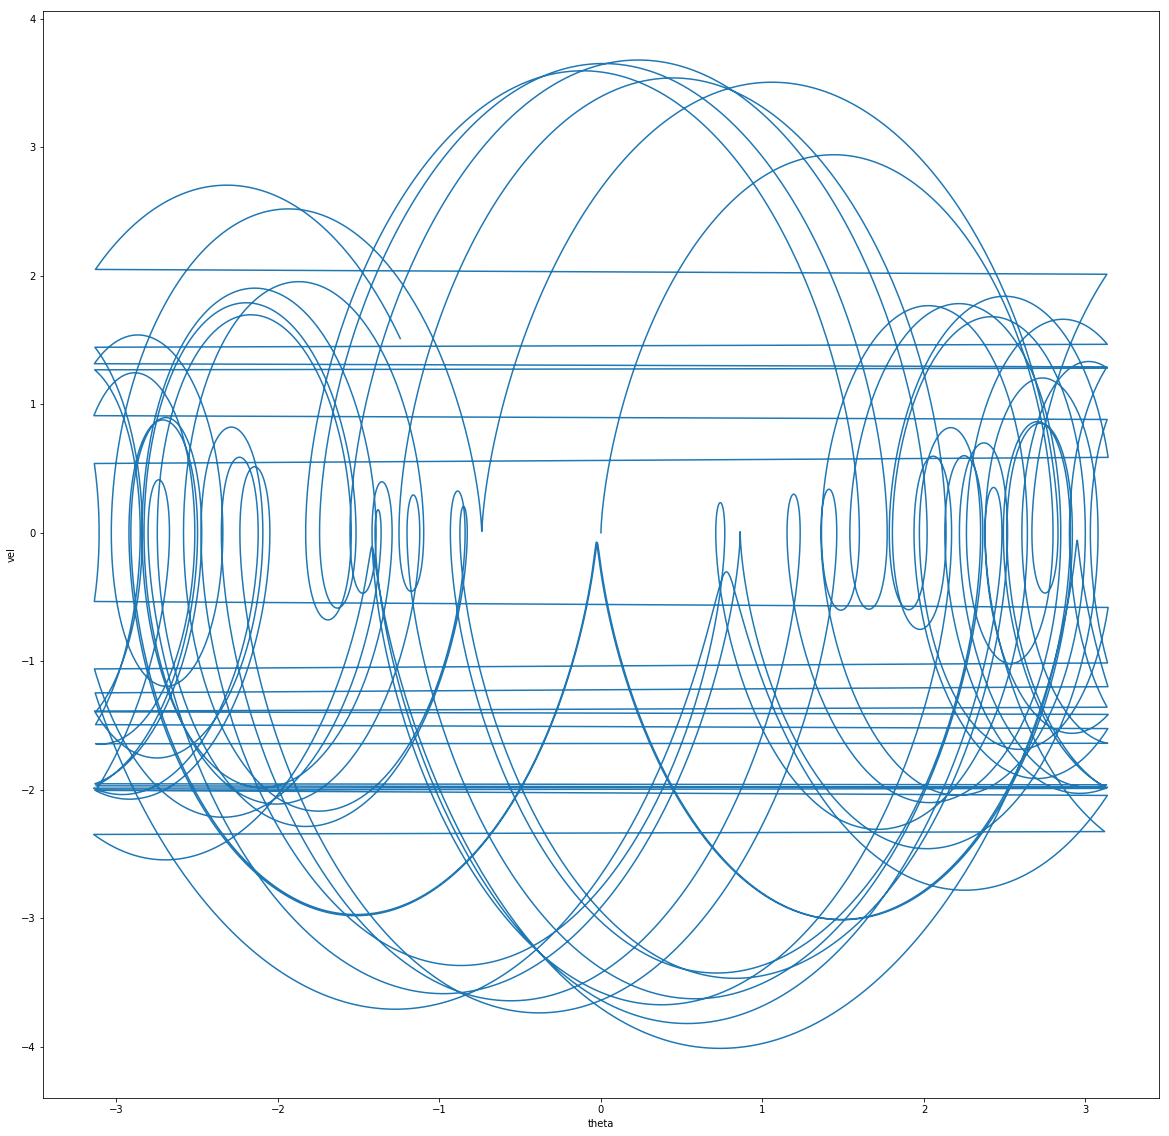

In [56]:
pi = math.pi
pend = []
numPlots = 1
maxPiFraction = 0.5
plt.clf()
for i in range(numPlots):
    pend.append(Pendulum((maxPiFraction * pi)*i/(numPlots)))

fig = plt.figure(figsize=(20,20));
for i in range(numPlots):
    run_oscillator(pend[i])
    sub = fig.add_subplot(111)
    sub.plot(pend[i].theta, pend[i].vel)
    
# plt.xlim([-5,5])
# plt.ylim([-3,3])
plt.xlabel('theta')
plt.ylabel('vel')
plt.show()



In [57]:
def solve_analytical_small():
    timestep = dt
    pend_small = Pendulum(1)
    t = 0
    for i in range(iterations):
            t += timestep
            pend_small.theta.append(pend_small.theta[0]*math.cos(k*t))
            pend_small.vel.append(-k*pend_small.theta[0]*math.sin(k*t))
            pend_small.t.append(t)
    return pend_small

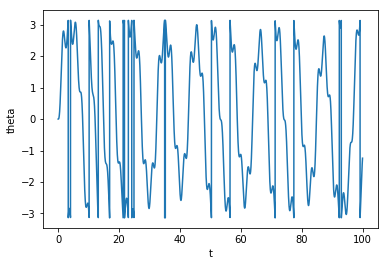

In [58]:
pend_small = solve_analytical_small()
plt.plot(pend[0].t, pend[0].theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

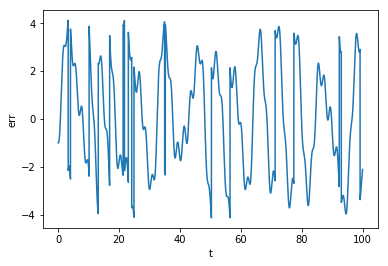

In [59]:
err = [];
for i in range(iterations+2):
    err.append(pend[0].theta[i] - pend_small.theta[i])

plt.plot(pend_small.t, err)
plt.xlabel('t')
plt.ylabel('err')
plt.show()